In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import mean
from numpy import std
import scipy
import datetime
from scipy.optimize import minimize
%matplotlib inline
import scipy.optimize as sco
import scipy.interpolate as sci
import math

In [ ]:
data = pd.read_csv("/content/drive/Shareddrives/ADS2002 Portfolio Optimisation/Data/adjprice.csv")
data.head()

In [ ]:
pip install riskfolio-lib

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# data = pd.read_csv("data/adjprice.csv")

In [ ]:
data['Date'] = pd.to_datetime(data['Date'], format='%Y%m%d')
data.head()

,Date,0111145D US Equity,0202445Q US Equity,0203524D US Equity,0226226D US Equity,0376152D US Equity,0440296D US Equity,0544749D US Equity,0574018D US Equity,0598884D US Equity,...,YNR US Equity,YRCW US Equity,YUM US Equity,YUMC US Equity,ZBH US Equity,ZETHQ US Equity,ZION US Equity,ZRN US Equity,ZTS US Equity,ZTS-W US Equity
0,1993-09-07,13.2719,13.6829,8.4429,8.1042,11.000,57.3245,17.8887,6.8315,28.1246,...,NaN,144439.5121,NaN,NaN,NaN,6.875,7.1675,30.7970,NaN,NaN
1,1993-09-08,13.3263,13.5315,8.2147,7.9590,11.000,57.2096,17.8064,6.8315,27.5051,...,NaN,143691.1208,NaN,NaN,NaN,6.750,6.9766,30.0188,NaN,NaN
2,1993-09-09,13.7070,13.3800,8.7852,8.0627,11.125,59.1625,17.6831,6.8315,27.7529,...,NaN,143691.1208,NaN,NaN,NaN,6.625,6.9554,30.0188,NaN,NaN
3,1993-09-10,13.3807,13.4810,9.4127,8.0368,11.125,59.6220,17.6420,6.8773,27.5051,...,NaN,145187.9033,NaN,NaN,NaN,6.750,7.2099,29.6852,NaN,NaN
4,1993-09-11,13.3807,13.4810,9.4127,8.0368,11.125,59.6220,17.6420,6.8773,27.5051,...,NaN,145187.9033,NaN,NaN,NaN,6.750,7.2099,29.6852,NaN,NaN


In [ ]:
start = datetime.datetime(2000,1,1)
end= datetime.datetime(2010,12,31)

In [ ]:
stocks_short = data[(data["Date"] >= start) & (data["Date"] <= end)]
stocks_short.dropna(axis=1,inplace=True)

<ipython-input-14-81995246fd56>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stocks_short.dropna(axis=1,inplace=True)


In [ ]:
psy= stocks_short.set_index('Date')

In [ ]:
assets= psy.columns
returs = psy[assets].pct_change().dropna()
returs.head()

,0111145D US Equity,0203524D US Equity,0772031D US Equity,0848680D US Equity,0948669D US Equity,0961514D US Equity,1040983D US Equity,1073675D US Equity,1086832D US Equity,1255459D US Equity,...,X US Equity,XEL US Equity,XL US Equity,XLNX US Equity,XOM US Equity,XRAY US Equity,XRX US Equity,YRCW US Equity,YUM US Equity,ZION US Equity
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2000-01-03,-0.030773,0.051099,-0.020350,-0.020428,-0.021159,-0.018480,-0.019774,0.000000,-0.031911,-0.020833,...,-0.035986,-0.025645,-0.009637,0.028181,-0.027929,-0.005289,0.066115,0.000000,-0.033978,-0.062303
2000-01-04,0.005954,-0.045835,-0.054882,-0.033175,-0.029734,-0.014642,-0.027858,0.028302,-0.016482,-0.074468,...,-0.037330,0.023038,-0.045012,-0.022727,-0.019154,0.000000,-0.046511,-0.018587,-0.020102,-0.048422
2000-01-05,0.027614,-0.068413,-0.001585,0.025491,-0.022285,0.040337,-0.013834,0.146789,0.019558,0.068966,...,0.010205,0.038573,0.008916,-0.021888,0.054517,0.017285,0.051489,0.015152,0.005133,-0.001185
2000-01-06,0.015357,0.037497,-0.056602,-0.030593,0.005703,-0.003650,-0.115231,-0.064000,0.021915,0.036559,...,0.006062,-0.009279,0.007576,-0.086714,0.051699,0.001310,-0.020618,0.029851,-0.008506,0.014219


In [ ]:
import riskfolio as rp

# Building the portfolio object

port = rp.Portfolio(returns=returs)

# calculating optimal portfolio
# Select method and estimate input parameters:

methmu = 'hist' #Method to estimate expected returns based on historical data
methcov= 'hist' #Method to estimate covariance matrix based on historical data

port.assets_stats(methmu=methmu,methcov=methcov, d=0.94)

#  Estimate the optimal portfolio
model = 'Classic' #Could be Classic(historical), BL OR FM
rm = 'MV'#Variance
obj = 'Sharpe' #Objective function could be MinRisk, MaxRet, Utility or Sharpe Ratio
hist = True
rf =  0 #rf=risk free rate
l= 0 # only useful when obj is 'Utility'

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)
yu = w.T
yu

You must convert self.cov to a positive definite matrix


,0111145D US Equity,0203524D US Equity,0772031D US Equity,0848680D US Equity,0948669D US Equity,0961514D US Equity,1040983D US Equity,1073675D US Equity,1086832D US Equity,1255459D US Equity,...,X US Equity,XEL US Equity,XL US Equity,XLNX US Equity,XOM US Equity,XRAY US Equity,XRX US Equity,YRCW US Equity,YUM US Equity,ZION US Equity
weights,1.511987e-09,6.696814e-10,6.576863e-10,4.170963e-10,8.843138e-10,2.167093e-09,3.634887e-10,5.482427e-10,1.141833e-09,1.552981e-09,...,5.777226e-10,2.481774e-09,5.136449e-10,6.756763e-10,1.175755e-09,3.125338e-09,6.909585e-10,3.759303e-10,2.344422e-09,5.615613e-10


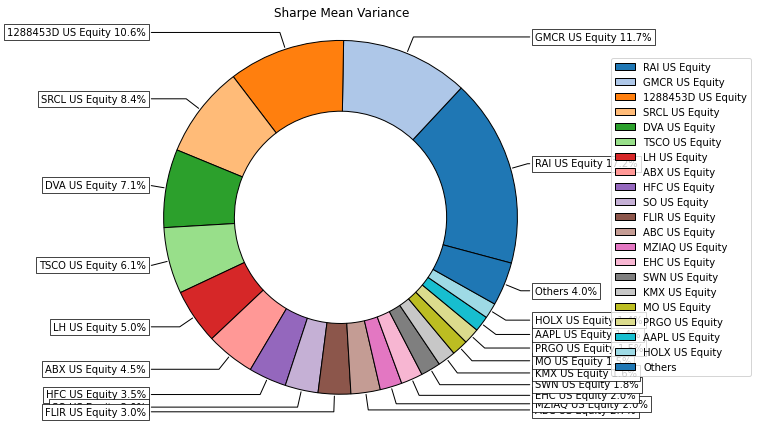

In [ ]:
# Plotting the composition of the portfolio

ax = rp.plot_pie(w=w, title = 'Sharpe Mean Variance', others = 0.05, nrow=25, cmap = 'tab20',
                height=6, width = 10, ax = None)

In [ ]:
points = 50
frontier = port.efficient_frontier(model=model,rm=rm,points = points, rf=rf, hist=hist)
yi= frontier.T
yi.head()

,0111145D US Equity,0203524D US Equity,0772031D US Equity,0848680D US Equity,0948669D US Equity,0961514D US Equity,1040983D US Equity,1073675D US Equity,1086832D US Equity,1255459D US Equity,...,X US Equity,XEL US Equity,XL US Equity,XLNX US Equity,XOM US Equity,XRAY US Equity,XRX US Equity,YRCW US Equity,YUM US Equity,ZION US Equity
0,3.622612e-11,4.584183e-11,3.402853e-11,1.726107e-11,1.951517e-11,8.986341e-11,1.864633e-11,9.560165e-12,2.452985e-11,3.742307e-11,...,9.248586e-12,6.160966e-11,8.301261e-12,2.878365e-11,3.168772e-11,8.201202e-11,2.764118e-11,1.346493e-11,3.612710e-11,1.539873e-11
1,8.167942e-12,6.919316e-12,6.349734e-12,4.647763e-12,7.926751e-12,8.203045e-12,5.101736e-12,8.123683e-12,1.008966e-11,9.934036e-12,...,8.547200e-12,8.572771e-12,7.152544e-12,6.997106e-12,7.867722e-12,1.020222e-11,6.291009e-12,4.351159e-12,1.070823e-11,6.001582e-12
2,6.042622e-12,5.544314e-12,5.137128e-12,3.901965e-12,6.139741e-12,5.946320e-12,4.405764e-12,6.709731e-12,7.623402e-12,7.107514e-12,...,7.113509e-12,6.124626e-12,5.950515e-12,5.556503e-12,5.935919e-12,7.092975e-12,5.024867e-12,3.756480e-12,7.491854e-12,4.943020e-12
3,2.171185e-11,2.031557e-11,1.903032e-11,1.483240e-11,2.225747e-11,2.134697e-11,1.669896e-11,2.448521e-11,2.689263e-11,2.492349e-11,...,2.569138e-11,2.184062e-11,2.200214e-11,2.028321e-11,2.136773e-11,2.490548e-11,1.852964e-11,1.444568e-11,2.623859e-11,1.850863e-11
4,4.378485e-11,4.139770e-11,3.880347e-11,3.041669e-11,4.505674e-11,4.300960e-11,3.442597e-11,4.964994e-11,5.386193e-11,4.999570e-11,...,5.202321e-11,4.394896e-11,4.477149e-11,4.132783e-11,4.312474e-11,4.981486e-11,3.777489e-11,2.977705e-11,5.241026e-11,3.784408e-11


In [ ]:
# plotting the efficient frontier

label = 'Maximum Risk Adjusted Return Portfolio'
mu = port.mu
cov = port.cov
returns = port.returns


ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns,
                     rm=rm, rf=rf, alpha =0.05, cmap= 'viridis', w=w,
                     label=label, marker= '*', s=16, c='r', height=6,width=10,ax=None)

In [ ]:
ax= rp.plot_frontier_area(w_frontier=frontier, cmap='tab20', height = 6,
                         width = 10, ax = None)